# Basic Matplotlib cookbook

By [Terence Parr](https://parrt.cs.usfca.edu). If you like visualization in machine learning, check out my stuff at [explained.ai](https://explained.ai).

This notebook shows you how to generate basic versions of the common plots you'll need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

# Get some sample data

In [2]:
df_cars = pd.read_csv("data/cars.csv")
df_cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [3]:
# Get average miles per gallon for each car with the same number of cylinders
avg_mpg = df_cars.groupby('CYL').mean()['MPG']
avg_mpg

CYL
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: MPG, dtype: float64

In [4]:
avg_wgt = df_cars.groupby('CYL').mean()['WGT'] # do the same for average weight

In [5]:
# Get average miles per gallon for each car with the same weight
avg_mpg_per_wgt = df_cars.groupby('WGT').mean()['MPG']
avg_mpg_per_wgt

WGT
1613    35.000000
1649    31.000000
1755    39.099998
1760    35.099998
1773    31.000000
          ...    
4951    12.000000
4952    12.000000
4955    12.000000
4997    11.000000
5140    13.000000
Name: MPG, Length: 346, dtype: float64

In [6]:
# Get the unique list of cylinders in numerical order
cyl = sorted(df_cars['CYL'].unique())
cyl

[3, 4, 5, 6, 8]

In [7]:
# Get a list of all mpg values for three specific cylinder sizes
cyl4 = df_cars[df_cars['CYL']==4]['MPG'].values
cyl6 = df_cars[df_cars['CYL']==6]['MPG'].values
cyl8 = df_cars[df_cars['CYL']==8]['MPG'].values

In [8]:
cyl4[0:20]

array([24., 27., 26., 25., 24., 25., 26., 27., 28., 25., 22., 23., 28.,
       30., 30., 31., 35., 27., 26., 24.])

## The most common plots

This section shows how to draw very basic plots using the recommended template:

```
fig, ax = plt.subplots(figsize=(width,height))
ax.plottype(args)
plt.show()
```

The default plot style is not particularly beautiful nor informative, but we have to learn the basics first.

### Histogram of car weight visualized as barchart

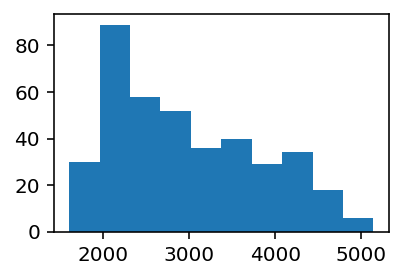

In [9]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.hist(df_cars['WGT'])
plt.show()

Changing the number of bins is sometimes a good idea; it's a matter of sending in a new parameter:

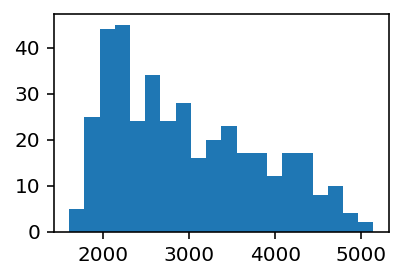

In [39]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.hist(df_cars['WGT'], bins=20)
plt.show()

### Line plot of number of cylinders vs average miles per gallon

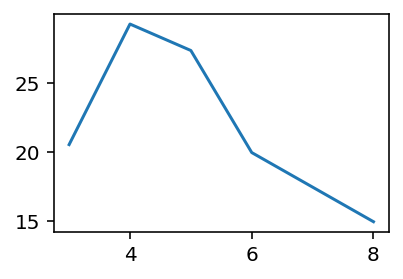

In [10]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.plot(cyl, avg_mpg)
plt.show()

### Scatterplot of weight versus miles per gallon

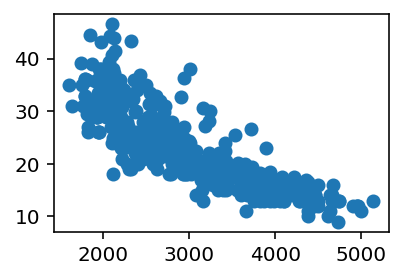

In [11]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.scatter(df_cars['WGT'], df_cars['MPG'])
plt.show()

Note that if you try to use `plot()` it gives you a screwed up plot; line drawing is not appropriate for data with multiple Y values per X value. Instead, the 

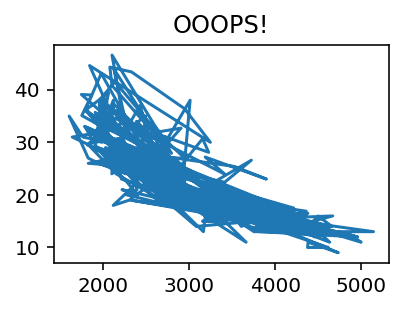

In [12]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.plot(df_cars['WGT'], df_cars['MPG'])
ax.set_title("OOOPS!")
plt.show()

### Line plot of average miles per gallon grouped by weight

If we want to use a line plot,  we should plot the weight versus average miles per gallon at that weight.

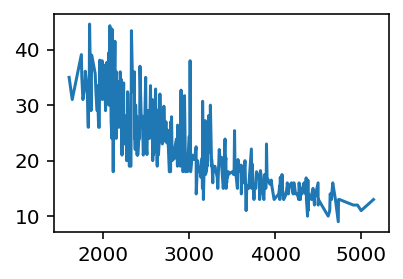

In [13]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.plot(avg_mpg_per_wgt)
plt.show()

I'm using a trick here. Note that `avg_mpg_per_wgt` is a series, which has an index (WGT) and the value (MPG)  so I can pass this as a single parameter to matplotlib. matplotlib is flexible enough to recognize this and pull out the X and Y coordinates automatically for us.

In [14]:
avg_mpg_per_wgt

WGT
1613    35.000000
1649    31.000000
1755    39.099998
1760    35.099998
1773    31.000000
          ...    
4951    12.000000
4952    12.000000
4955    12.000000
4997    11.000000
5140    13.000000
Name: MPG, Length: 346, dtype: float64

### Bar chart of average miles per gallon grouped by number of cylinders

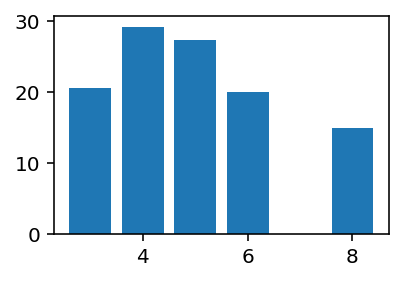

In [15]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.bar(cyl, avg_mpg)
plt.show()

### Box plot of miles per gallon grouped by number of cylinders

A box plot needs a collection of values for each X coordinate, and we are passing in three lists.

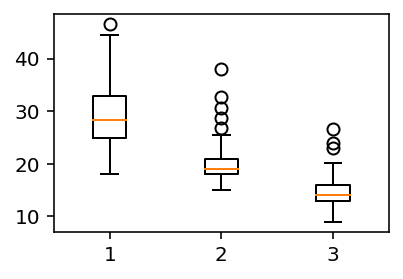

In [16]:
fig, ax = plt.subplots(figsize=(3,2))
ax.boxplot([cyl4,cyl6,cyl8])
plt.show()

### Violin plot of miles per gallon grouped by number of cylinders

As with box plot, we need a collection of values for each X coordinate. All we've done here is to change the function we're calling.

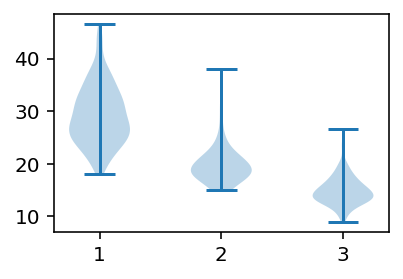

In [17]:
fig, ax = plt.subplots(figsize=(3,2))
ax.violinplot([cyl4,cyl6,cyl8])
plt.show()

## Creating a grid of plots

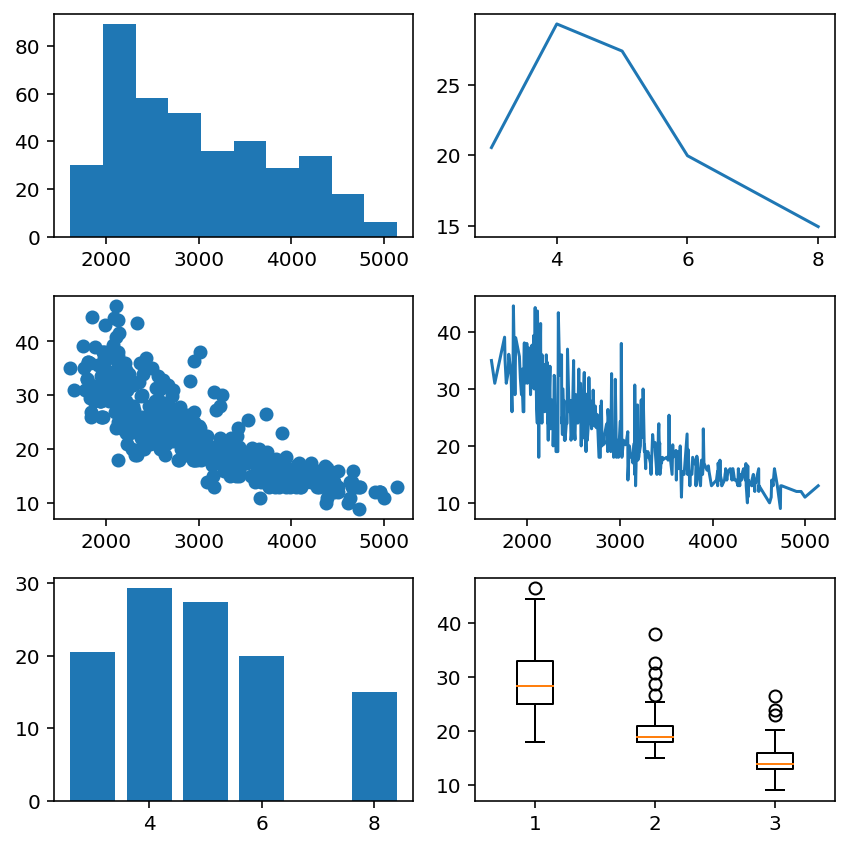

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6,6))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector

axes[0].hist(df_cars['WGT'])
axes[1].plot(cyl, avg_mpg)
axes[2].scatter(df_cars['WGT'], df_cars['MPG'])
axes[3].plot(avg_mpg_per_wgt)
axes[4].bar(cyl, avg_mpg)
axes[5].boxplot([cyl4,cyl6,cyl8])

plt.tight_layout() # I add this anytime I have a grid as it "does the right thing"
plt.show()

## Adding a title and labels to axes

At a minimum, plots should always have labels on the axes and, regardless of the plot type, we can set the X and Y labels on the matplotlib canvas with two method calls. We can even set the overall title easily with another call.

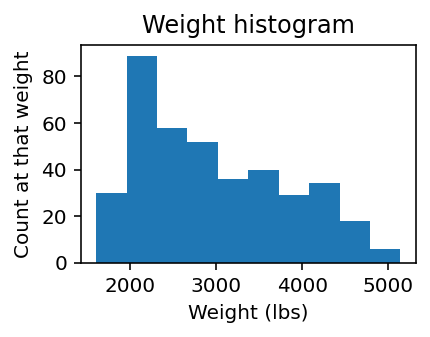

In [19]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Weight histogram")
plt.show()

## Dual Y axes for single X axis

When you want to plot to curves on the same graph that have the same X but different Y scales, it's a good idea to use dual Y axes. All it takes is a call to `twinx()` on your main canvas (`ax` variable) to get another canvas to draw on:

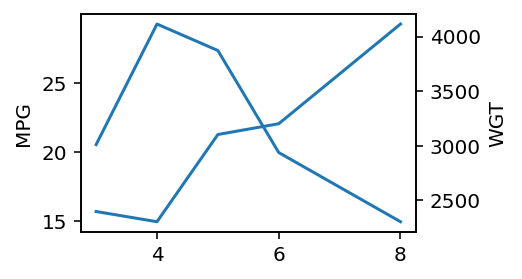

In [32]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax_wgt = ax.twinx()
ax.plot(cyl, avg_mpg)
ax_wgt.plot(cyl, avg_wgt)
ax.set_ylabel("MPG")
ax_wgt.set_ylabel("WGT")
plt.show()

We should be using different colors for those curves, but we'll look at that in another notebook.

Dual axes should be used infrequently but sometimes it's necessary for space reasons, so I'm showing it here.

## Displaying images

Displaying an image using matplotlib is done using  function `imshow()`. First, we load a picture of Terence enjoying his childhood using the PIL library:

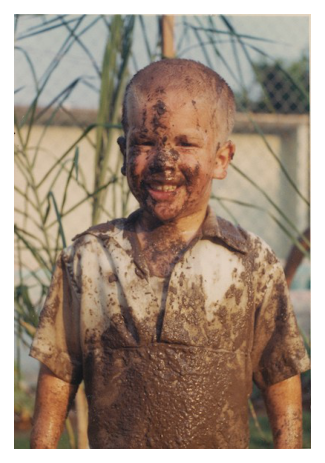

In [73]:
from PIL import Image
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
mud = Image.open("images/mud.jpg")
plt.imshow(mud)
ax.axis('off') # don't show x, y axes
plt.show()

## Matrices as images

When you start doing machine learning, particularly deep learning, one of the first examples is to classify handwritten digits. I have created a sample CSV of these digits we can easily load into a data frame. Each row is a flattened array of 28x28=784 values for a single handwritten digit image, where values are in 0..1:

In [88]:
df_digits = pd.read_csv('https://mlbook.explained.ai/data/mnist-10k-sample.csv.zip')
true_digits = df_digits['digit']
df_images = df_digits.drop('digit', axis=1) # ignore the true digit number
df_images.head(3)

,px0.0,px0.1,px0.2,px0.3,px0.4,px0.5,px0.6,px0.7,px0.8,px0.9,...,px27.18,px27.19,px27.20,px27.21,px27.22,px27.23,px27.24,px27.25,px27.26,px27.27
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Just as we did with a jpg image, we can treat a 2D matrix as an image and display it. Let's pull the first row, reshape to be a 28x28 matrix, and display using greyscale:

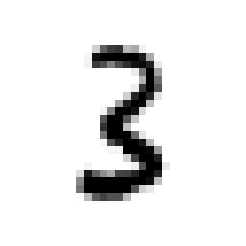

In [165]:
six_img_as_row = df_images.iloc[0].values  # digit '3' is first row
img28x28 = six_img_as_row.reshape(28,28) # unflatten as 2D array
fig, ax = plt.subplots(1, 1, figsize=(2,2))
ax.imshow(img28x28, cmap='binary')
ax.axis('off') # don't show x, y axes
plt.show()

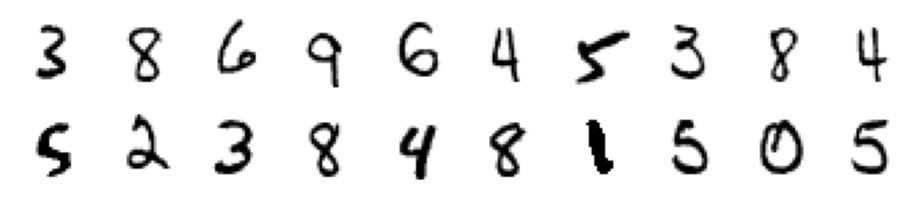

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(8, 1.6))

for i, ax in enumerate(axes.flatten()):
    img_as_row = df_images.iloc[i].values
    img28x28 = img_as_row.reshape(28,28)
    ax.axis('off') # don't show x, y axes
    ax.imshow(img28x28, cmap='binary')
plt.show()

## Heat maps

It's often difficult to look at a matrix of numbers and recognize patterns or see salient features.  A good way to look for patterns is to visualize the matrix (or vector) as a heat map where each value gets a color on a spectrum.

As data, let's ask pandas for the correlation between every pair of columns:

In [154]:
C = df_cars.corr()
C

,MPG,CYL,ENG,WGT
MPG,1.000000,-0.777618,-0.805127,-0.832244
CYL,-0.777618,1.000000,0.950823,0.897527
ENG,-0.805127,0.950823,1.000000,0.932994
WGT,-0.832244,0.897527,0.932994,1.000000


Then we can display the absolute value of those correlations as the spectrum of blues:

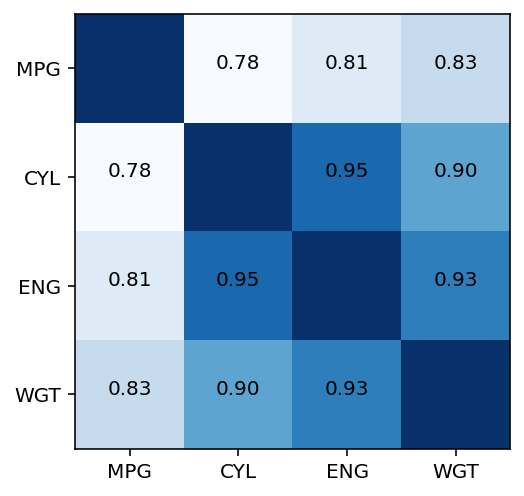

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

C = np.abs(C)

# Use vmin to set white (lowest color) to be the min value
ax.imshow(C, cmap='Blues', vmin=np.min(C.values))

# Add correlation to each box
for i in range(4):
    for j in range(4):
        if i!=j:
            ax.text(i, j, f"{C.iloc[i,j]:.2f}", horizontalalignment='center')
        
ax.set_xticks(range(4))
ax.set_xticklabels(list(C.columns))
ax.set_yticks(range(4))
ax.set_yticklabels(list(C.columns))
plt.show()

## Saving plots as images

You can save plots in a variety of formats. `svg` and `pdf` are good ones because these files are actually a set of commands needed to redraw the image and so can be scaled very nicely. `png` and `gif` will be much smaller typically but have fixed resolution.

Instead of calling `show()`, we use `savefig()` (but the image still appears in the notebook as well as storing it on the disk in the current working directory):

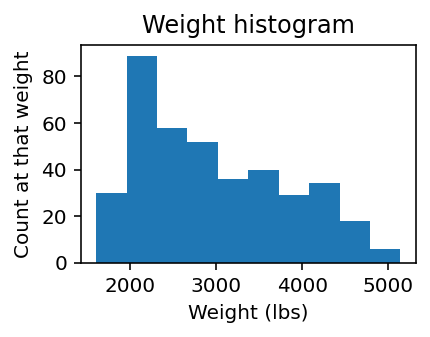

In [21]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.hist(df_cars['WGT'])
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Weight histogram")

plt.savefig("histo.pdf", bbox_inches='tight', pad_inches=0)

The `bbox_inches='tight', pad_inches=0` parameters are something I use all the time to make sure there is no padding around the image. When I incorporate an image into a paper or something, I can add my own padding. it just gives us more control.

On your mac, use the Finder to go to the directory holding this notebook and you should see `histo.pdf`.

## Exercise


1. Create your own notebook and retype all of these examples so that you start to memorize the details. Of course, once you have typed in the template a few times, you can cut-and-paste those parts:
```
fig, ax = plt.subplots(figsize=(2,1.5))
...
plt.show()
```
1. Add axis labels and a title to a few of the plots.
1. Make sure that you can save at least one of the figures in each of `pdf` and `png` formats.